0


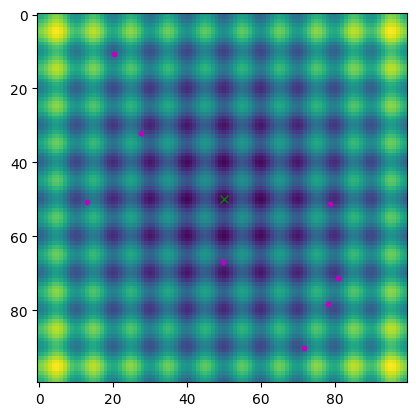

1


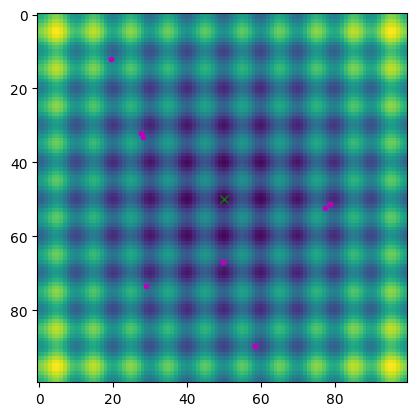

2


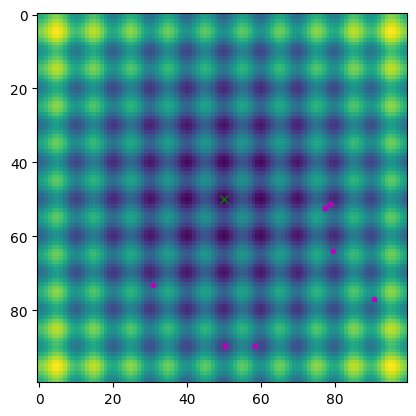

3


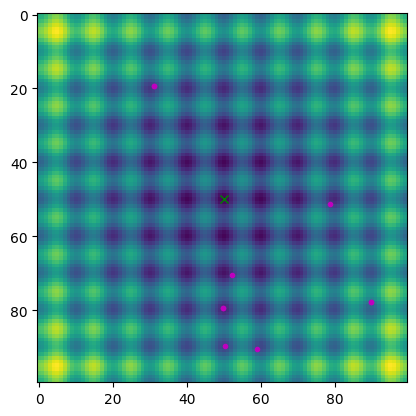

4


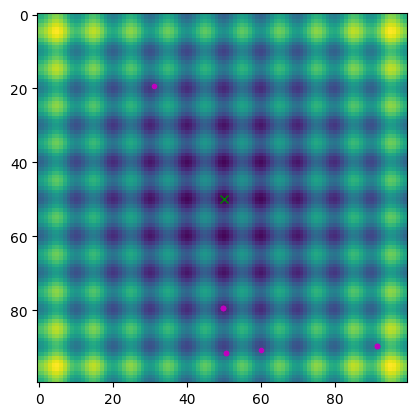

5


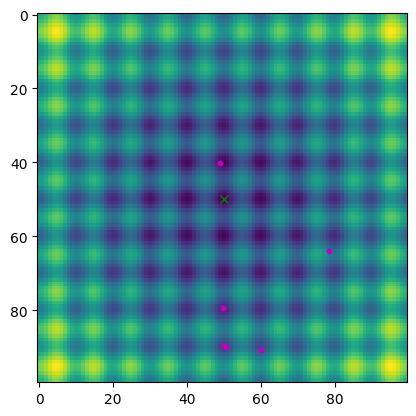

6


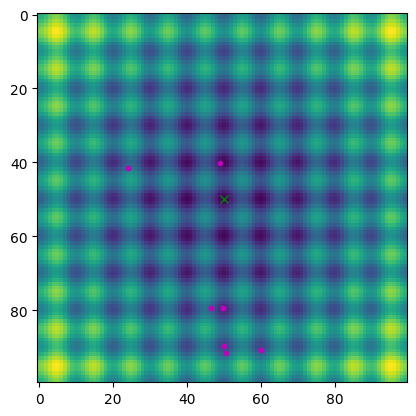

7


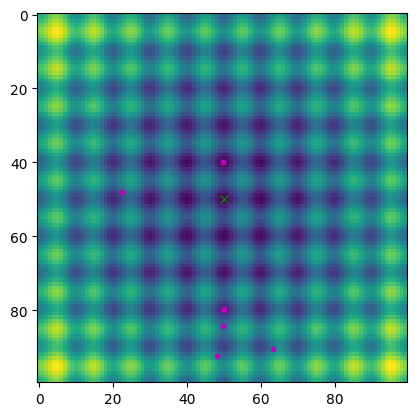

8


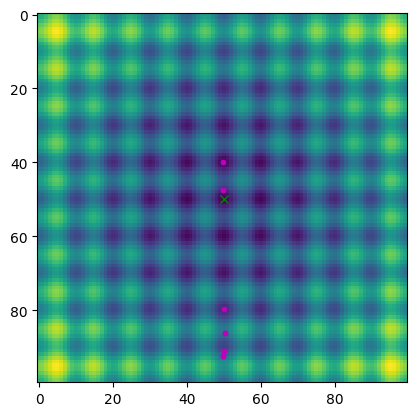

9


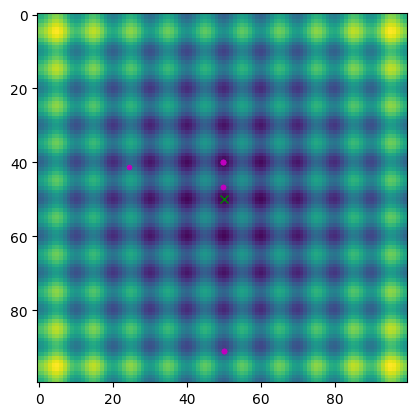

10


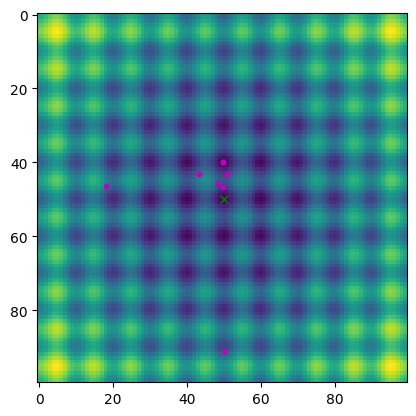

11


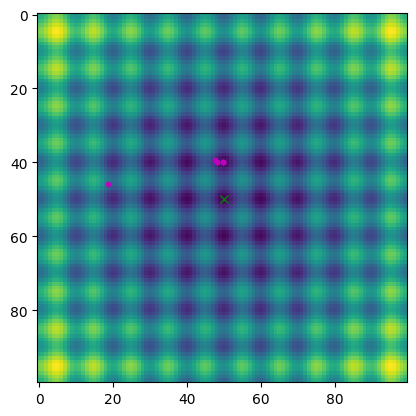

12


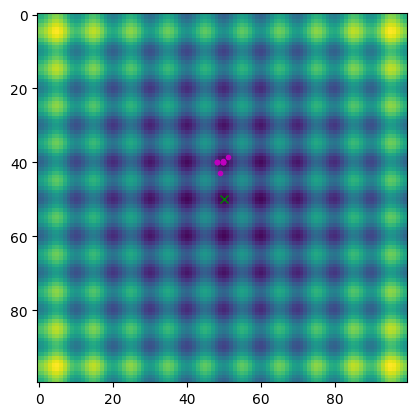

13


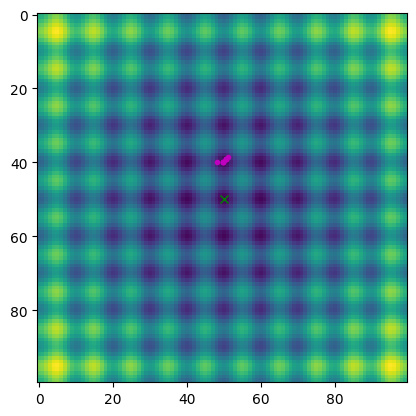

14


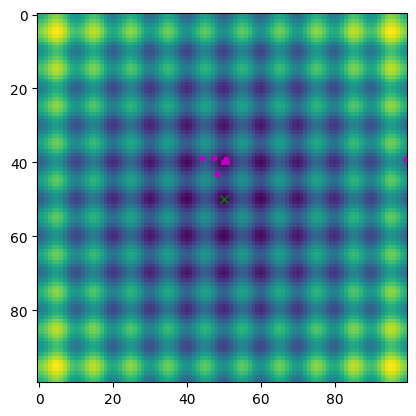

15


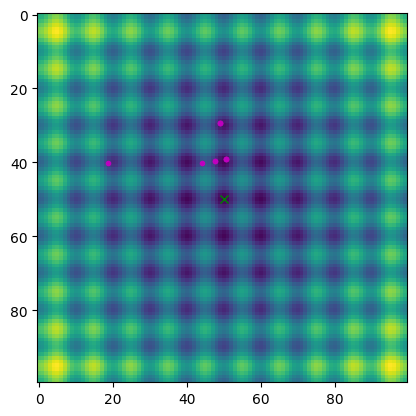

16


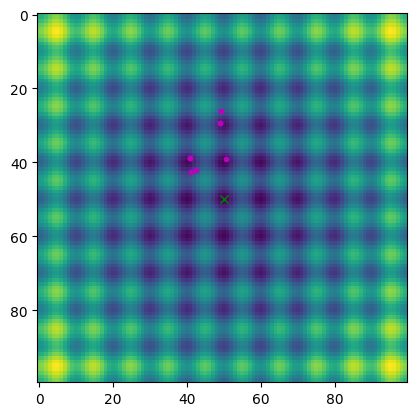

17


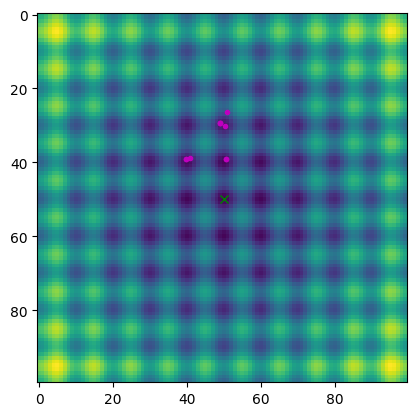

18


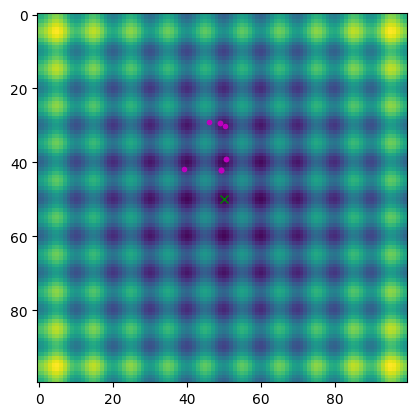

19


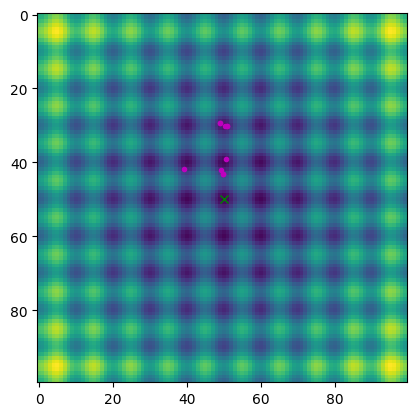

20


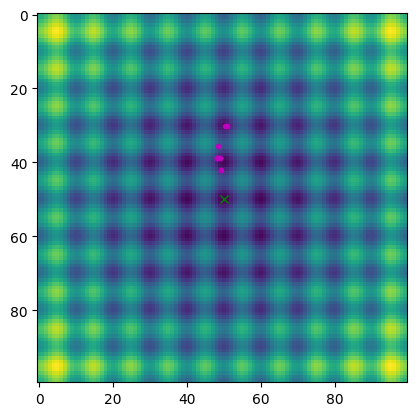

21


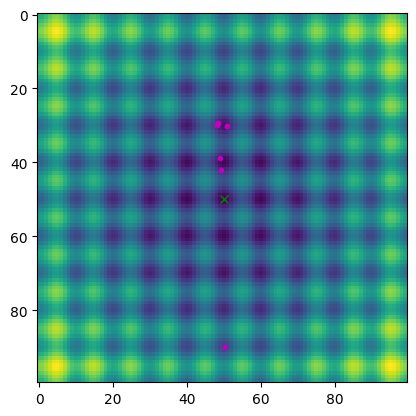

22


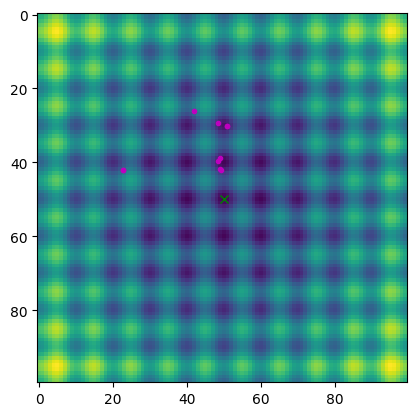

23


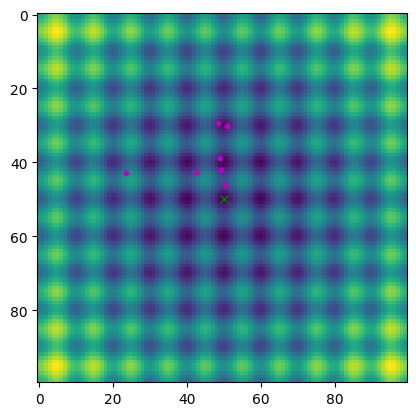

24


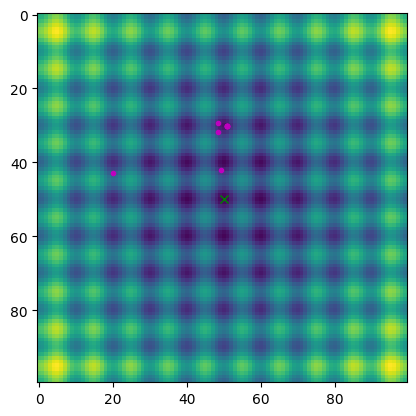

25


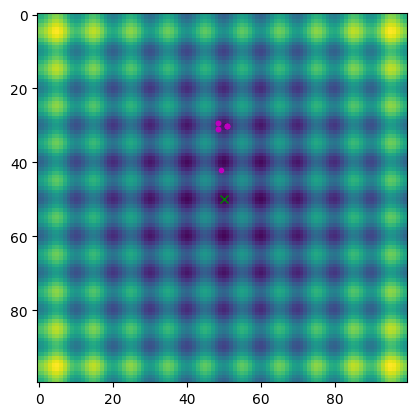

26


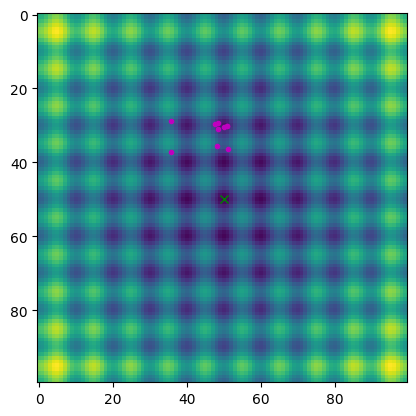

27


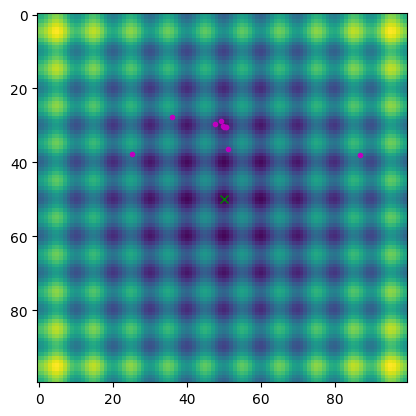

28


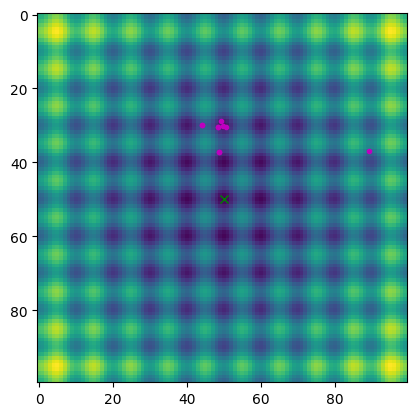

29


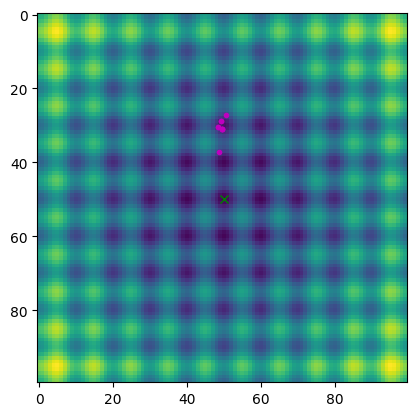

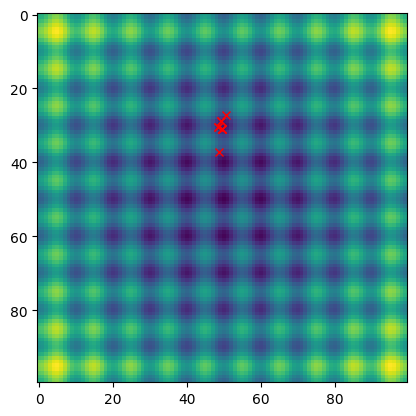

In [1]:
# -*- coding: utf-8 -*-
"""
KTSO-02-21

@author: khokhlov
"""
import numpy as np

import matplotlib.pyplot as plt


def fitness(x1,x2):
    x1=x1-5
    x2=x2-5
    return 10*2+(x1**2-10*np.cos(2*np.pi*x1))+ (x2**2-10*np.cos(2*np.pi*x2))


x_max=100
z=np.zeros([x_max,x_max])
for i in range(0,x_max):
    for j in range(0,x_max):
        z[i,j]=fitness(i*0.1,j*0.1)

plt.imshow(z)

n_objects=10

x_min = 0
x_max = 10.23
mask_1=992
mask_2=31

n_iters=30

p_mutacia = 0.5

wins= np.zeros([n_objects,2])
p_1 = np.zeros([n_objects,2])
p_2 = np.zeros([n_objects,2])
ch  = np.zeros([n_objects,2])
x_all  =np.zeros([2*n_objects,2])
y_all  =np.zeros([2*n_objects,1])

tmp=np.zeros([n_objects,2])
for i in range(0,n_objects):
    wins[i,:] = [np.random.rand()*x_max, np.random.rand()*x_max]

for i in range(0,n_iters):
    print(i)
    p_1=wins
    for j in range(0,n_objects):
        p_2[j,:]=wins[np.random.randint(0,n_objects),:]

    for j in range(0,n_objects):
        for k in range(0,2):
            ch[j,k] = (int(int(100*(p_1[j,k])) & mask_1) | int(int(100*(p_2[j,k])) & mask_2))/100
            r=2**np.random.randint(1,10)
            ch[j,k] =  (( r - (r&int(ch[j,k]*100)))|(int(ch[j,k]*100)&(~r)))/100


####  variacionnii ryad ######
    x_all[0:n_objects,:]= wins
    x_all[n_objects:2*n_objects,:]=ch
    y_all=fitness(x_all[:,0],x_all[:,1])
    indx=np.argsort(y_all)
    x_all=x_all[indx,:]
    wins=x_all[0:n_objects,:]

 ###   ruletka   #####
    x_all[0:n_objects,:]= wins
    x_all[n_objects:2*n_objects,:]=ch
    y_all=fitness(x_all[:,0],x_all[:,1])
    y_max=max(y_all)
    y_all=y_max-y_all

    y_all = y_all/sum(y_all)

    for i in range(0,n_objects):
        p=0
        arrow =  np.random.random()
        for j in range(0,2*n_objects):
            p=p+y_all[j]
            if arrow<p:
                tmp[i,:]=x_all[j,:]
                break
    wins=tmp

    plt.imshow(z)
    plt.plot(10 * wins[:, 0], 10 * wins[:, 1], '.m')
    plt.plot(50, 50, 'xg')
    plt.show()

plt.figure()
plt.imshow(z)
plt.plot(10*wins[:,0],10*wins[:,1],'xr')
plt.show()



